In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [2]:
## uni = file name
uni = "test"

path = "/users/yewzzang/work/KNO_reconstruction/KNO_vertex/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [3]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

khu_test_64f_8h_200n_3l
khu_test_64f_8h_200n_5l
test_mul


0 363  /  MTL = 74.8856462  /  MTL epoch = 0354  /  71.5624482  /  MVL = 71.5624482  /  MVL epoch = 0224  /  khu_test_64f_8h_200n_5l
1 389  /  MTL = 75.8937367  /  MTL epoch = 0346  /  83.5328078  /  MVL = 83.5328078  /  MVL epoch = 0147  /  khu_test_64f_8h_200n_3l
2 37  /  MTL = 188.3612796  /  MTL epoch = 0036  /  188.8704426  /  MVL = 188.8704426  /  MVL epoch = 0035  /  test_mul


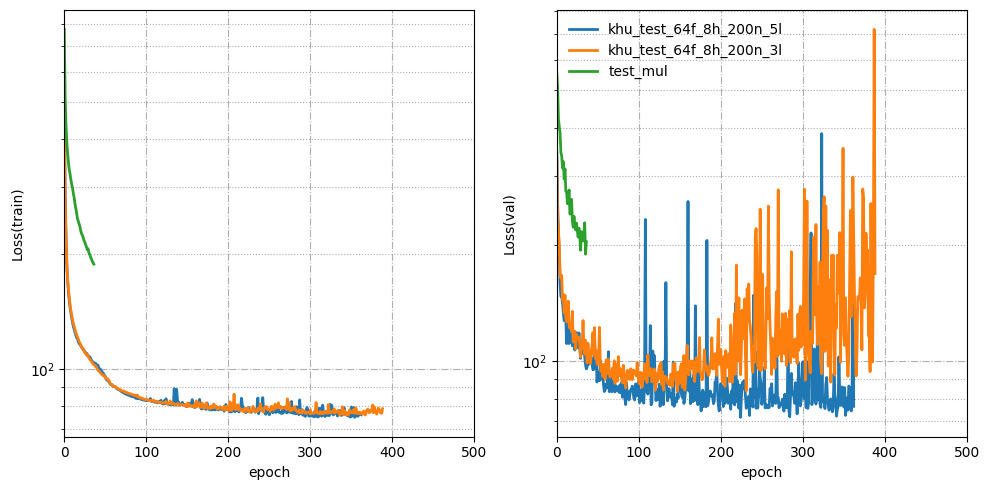

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,500])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'], linewidth=2) 
    ax2.plot(df['val_loss'], linewidth=2,label=label.split('/')[-2])
   
    print(i,
          len(df['loss']),
          ' / ',
          "MTL = " + f"{df['loss'].min():.7f}",
          " / ",
          "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
          " / ",
          f"{df['val_loss'].min():.7f}",
          " / ",
          "MVL = " + f"{df['val_loss'].min():.7f}",
          " / ",
          "MVL epoch = " + str("{:04}".format(np.where(df['val_loss']==df['val_loss'].min())[0][0])),
          " / ",
          label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.legend()
plt.show()
plt.close()